#Final Report - Data Cleaning Codebook

###By : Dietmar Krause & Andrew Yang

This notebook contains the functions that were implemented to clean and re-structure the data, process part of it, and parse it to be implemented in the Tableau document.

## Important Libraries and modules to work with


In [2]:
!pip install uszipcode
!pip install us

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import us
from uszipcode import SearchEngine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 KB 13.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11940 sha256=cdaa89f662c9f13df332509f050a59686dfdb573c57bbb1e4dac37f637a83076
  Stored in directory: /root/.cache/pip/wheels/1a/93/5b/98d3861ec2c4a9d90b16324c6f8d7e4db03e6a830bc993adbb
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp39-cp39-linux_x86_64.whl size=82484 sha256=50e6b5bc7610926560642465201f638a9b66fbd508dc46aaf83afadb9b9b59a4
  Stored in directory: /root/.cache/pip/wheels/e6/7d/be/a937dbd

/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Clean Data


Clean the data obtained from the course-provided dataset: 
https://www.kaggle.com/datasets/rishidamarla/fast-food-restaurants-in-america?select=FastFoodRestaurants.csv

In [12]:
def clean_data():
    """This function goes into the names column in FastFoodRestaurants.csv and identifies if the name belongs to a general name, so it assign
    that name to a new column called 'real_name' and then it drops the names column
    
    Also it drops the 'address' column because it is not needed for the analysis
    
    args: None
    returns: Pandas Dataframe (also it stores the cleaned data in a new file called cleaned_data.csv)"""

    df = pd.read_csv('FastFoodRestaurants.csv')
    #drop the address column
    df.drop('address', axis=1, inplace=True)
    #drop the latitude and longitude columns
    df.drop('latitude', axis=1, inplace=True)
    df.drop('longitude', axis=1, inplace=True)
    #drop the country column
    df.drop('country', axis=1, inplace=True)
    #if the postalcode column, then drop the row
    df.dropna(subset=['postalCode'], inplace=True)
    #if "A","W", and "&" are in the name, no matter the order or if they are in lower or upper case, or if there's space between the letters, then its value in general_name column is "A&W"

    df['name'] = np.where(
        df['name'].str.contains(
            re.compile(r'\bA\s?&\s?W\b|\bW\s?&\s?A\b', re.IGNORECASE)
        ),
        'A&W',
        df['name'])
    #if name is equal to "Wendys" or "Wendy's" then its value in general_name column is "Wendy's"
    df['name'] = np.where(df['name'].str.contains('Wendys|Wendy\'s', case=False), 'Wendy\'s', df['name'])
    #if name is equal to "Topper's Pizza" or "Toppers Pizza" then its value in general_name column is "Topper's Pizza"
    df['name'] = np.where(df['name'].str.contains('Topper\'s Pizza|Toppers Pizza', case=False), 'Topper\'s Pizza', df['name'])
    #if "Trasher"  in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Trashers French Fries"  
    df['name'] = np.where(df['name'].str.contains('Thrasher', case=False), 'Trashers French Fries', df['name'])
    #if name is equal to "Taco Time" or "TacoTime" then its value in general_name column is "Taco Time"
    df['name'] = np.where(df['name'].str.contains('Taco Time|TacoTime', case=False), 'Taco Time', df['name'])
    #if name is equal to "Taco del mar" no matter the order or if they are in lower or upper case, then its value in general_name column is "Taco Del Mar"
    df['name'] = np.where(df['name'].str.contains('Taco del mar', case=False), 'Taco Del Mar', df['name'])
    #if "Subway" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Subway"
    df['name'] = np.where(df['name'].str.contains('Subway', case=False), 'Subway', df['name'])
    #if "Steak" and "Shake" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Steak 'n Shake"
    df['name'] = np.where(df['name'].str.contains('Steak', case=False)& df['name'].str.contains('shake', case=False), 'Steak \'n Shake', df['name'])
    #if "Sonic" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Sonic"
    df['name'] = np.where(df['name'].str.contains('Sonic', case=False), 'Sonic', df['name'])
    #if "spangle" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Spangle's"
    df['name'] = np.where(df['name'].str.contains('spangle', case=False), 'Spangle\'s', df['name'])
    #if "Rubio" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Rubio's"
    df['name'] = np.where(df['name'].str.contains('Rubio', case=False), 'Rubio\'s', df['name'])
    #if "Rally" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Rally's"
    df['name'] = np.where(df['name'].str.contains('Rally', case=False), 'Rally\'s', df['name'])
    #if "Raising Cane's" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Raising Cane's"
    df['name'] = np.where(df['name'].str.contains('Raising Cane\'s', case=False), 'Raising Cane\'s', df['name'])
    #if "Quizno" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Quizno's"
    df['name'] = np.where(df['name'].str.contains('Quizno', case=False), 'Quizno\'s', df['name'])
    #if "qdoba" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Qdoba"
    df['name'] = np.where(df['name'].str.contains('qdoba', case=False), 'Qdoba', df['name'])
    #if "Popeyes" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Popeyes"
    df['name'] = np.where(df['name'].str.contains('Popeye', case=False), 'Popeyes', df['name'])
    #if "Port of Subs" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Port of Subs"
    df['name'] = np.where(df['name'].str.contains('Port of Subs', case=False), 'Port of Subs', df['name'])
    #if "Pizza Hut" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Pizza Hut"
    df['name'] = np.where(df['name'].str.contains('Pizza Hut', case=False), 'Pizza Hut', df['name'])
    #if "Papa John" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Papa John's"
    df['name'] = np.where(df['name'].str.contains('Papa John', case=False), 'Papa John\'s', df['name'])
    #if "Panda" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Panda"
    df['name'] = np.where(df['name'].str.contains('Panda', case=False), 'Panda', df['name'])
    #if "Mr" and "Hero" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Mr. Hero"
    df['name'] = np.where(df['name'].str.contains('Mr', case=False)& df['name'].str.contains('hero', case=False), 'Mr. Hero', df['name'])
    #if "mc" and "Donald" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "McDonald's"
    df['name'] = np.where(df['name'].str.contains('mc', case=False)& df['name'].str.contains('donald', case=False), 'McDonald\'s', df['name'])
    #if "long john" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Long John Silver's"
    df['name'] = np.where(df['name'].str.contains('long john', case=False), 'Long John Silver\'s', df['name'])
    #if "Little" and "Caesars" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Little Caesars"
    df['name'] = np.where(df['name'].str.contains('Little', case=False)& df['name'].str.contains('caesar', case=False), 'Little Caesars', df['name'])
    #if "L&L" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "L&L"
    df['name'] = np.where(df['name'].str.contains('L&L', case=False), 'L&L', df['name'])
    #if "kum" and "go" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Kum & Go"
    df['name'] = np.where(df['name'].str.contains('kum', case=False)& df['name'].str.contains('go', case=False), 'Kum & Go', df['name'])
    #if "KFC" is in the name or ("kentucky" and "chicken") in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "KFC"
    df['name'] = np.where(df['name'].str.contains('KFC|kentucky fried chicken', case=False), 'KFC', df['name'])
    #if "jimmy" and "john" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Jimmy John's"
    df['name'] = np.where(df['name'].str.contains('jimmy|john', case=False), 'Jimmy John\'s', df['name'])
    #if "hot dog on a stick" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Hot Dog on a Stick"
    df['name'] = np.where(df['name'].str.contains('hot dog on a stick', case=False), 'Hot Dog on a Stick', df['name'])
    #if "hardee" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Hardee's"
    df['name'] = np.where(df['name'].str.contains('hardee', case=False), 'Hardee\'s', df['name'])
    #if "great steak" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Great Steak"
    df['name'] = np.where(df['name'].str.contains('great steak', case=False), 'Great Steak', df['name'])
    #if "frugal" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Frugal's"
    df['name'] = np.where(df['name'].str.contains('frugal', case=False), 'Frugal\'s', df['name'])
    #if "foster" and "freeze" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Foster's Freeze"
    df['name'] = np.where(df['name'].str.contains('foster', case=False)& df['name'].str.contains('freeze', case=False), 'Foster\'s Freeze', df['name'])
    #if "dunkin" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Dunkin Donuts"'"
    df['name'] = np.where(df['name'].str.contains('dunkin', case=False), 'Dunkin Donuts', df['name'])
    #if "Dq" and "Grill" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "DQ Grill & Chill"
    df['name'] = np.where(df['name'].str.contains('Dq', case=False)& df['name'].str.contains('grill', case=False), 'DQ Grill & Chill', df['name'])
    #if "domino" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Domino's"
    df['name'] = np.where(df['name'].str.contains('domino', case=False), 'Domino\'s', df['name'])
    #if "Dairy Queen" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Dairy Queen"
    df['name'] = np.where(df['name'].str.contains('Dairy Queen', case=False), 'Dairy Queen', df['name'])
    #if "Culver" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Culver's"
    df['name'] = np.where(df['name'].str.contains('Culver', case=False), 'Culver\'s', df['name'])
    #if "cousins subs" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Cousin's Subs"
    df['name'] = np.where(df['name'].str.contains('cousins subs', case=False), 'Cousin\'s Subs', df['name'])
    #if "costa vida" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Costa Vida"
    df['name'] = np.where(df['name'].str.contains('costa vida', case=False), 'Costa Vida', df['name'])
    #if "cook" and "out" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Cook Out"
    df['name'] = np.where(df['name'].str.contains('cook', case=False)& df['name'].str.contains('out', case=False), 'Cook Out', df['name'])
    #if "china king" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "China King"
    df['name'] = np.where(df['name'].str.contains('china king', case=False), 'China King', df['name'])
    #if "chick-fil-a" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Chick-fil-A"
    df['name'] = np.where(df['name'].str.contains('chick-fil-a', case=False), 'Chick-fil-A', df['name'])
    #if "checker" in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Checker's"
    df['name'] = np.where(df['name'].str.contains('checker', case=False), 'Checker\'s', df['name'])
    #if "carl" and "jr" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Carl's Jr."
    df['name'] = np.where(df['name'].str.contains('carl', case=False)& df['name'].str.contains('jr', case=False), 'Carl\'s Jr.', df['name'])
    #if "captain" and "d" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Captain D's"
    df['name'] = np.where(df['name'].str.contains('captain', case=False) & df['name'].str.contains('d', case=False), 'Captain D\'s', df['name'])
    #if "burgerville" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Burgerville"
    df['name'] = np.where(df['name'].str.contains('burgerville', case=False), 'Burgerville', df['name'])
    #if burguer king is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Burger King"
    df['name'] = np.where(df['name'].str.contains('burger king', case=False), 'Burger King', df['name'])
    #if "braum" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Braum's"
    df['name'] = np.where(df['name'].str.contains('braum', case=False), 'Braum\'s', df['name'])
    #if boston market is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Boston Market"
    df['name'] = np.where(df['name'].str.contains('boston market', case=False), 'Boston Market', df['name'])
    #if bob evans is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Bob Evans"
    df['name'] = np.where(df['name'].str.contains('bob evans', case=False), 'Bob Evans', df['name'])
    #if "blimpie" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Blimpie"
    df['name'] = np.where(df['name'].str.contains('blimpie', case=False), 'Blimpie', df['name'])
    #if "blake" and "lotaburger" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Blake's Lotaburger"
    df['name'] = np.where(df['name'].str.contains('blake', case=False)& df['name'].str.contains('lotaburger', case=False), 'Blake\'s Lotaburger', df['name'])
    #if "baja fresh" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Baja Fresh"
    df['name'] = np.where(df['name'].str.contains('baja fresh', case=False), 'Baja Fresh', df['name'])
    #if "b. good" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "B. Good"
    df['name'] = np.where(df['name'].str.contains('b. good', case=False), 'B. Good', df['name'])
    #if "arby" is in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Arby's"
    df['name'] = np.where(df['name'].str.contains('arby', case=False), 'Arby\'s', df['name'])
    #if "7" and "-" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "7-Eleven"
    df['name'] = np.where(df['name'].str.contains('7', case=False)& df['name'].str.contains('-', case=False), '7-Eleven', df['name'])
    #if "home" and "buffet" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Home Town Buffet"
    df['name'] = np.where(df['name'].str.contains('home', case=False)& df['name'].str.contains('buffet', case=False), 'Home Town Buffet', df['name'])
    #if "jack" and "box" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Jack in the Box"
    df['name'] = np.where(df['name'].str.contains('jack', case=False)& df['name'].str.contains('box', case=False), 'Jack in the Box', df['name'])
    #if "backyard" and "burger" are in the name, no matter the order or if they are in lower or upper case, then its value in general_name column is "Backyard Burgers"
    df['name'] = np.where(df['name'].str.contains('yard', case=False)& df['name'].str.contains('burger', case=False), 'Backyard Burgers', df['name'])

    #all the values in the general_name column that are not in the list are replaced with the value in the name column
    #now it creates a new csv file with the new data
    df.to_csv('cleaned_data.csv', index=False)

    return df


In [13]:
clean_data()

,city,keys,name,postalCode,province,websites
0,Massena,us/ny/massena/324mainst/-1161002137,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,Washington Court House,us/oh/washingtoncourthouse/530clintonave/-7914...,Wendy's,43160,OH,http://www.wendys.com
2,Maysville,us/ky/maysville/408marketsquaredr/1051460804,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,Massena,us/ny/massena/6098statehighway37/-1161002137,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,Athens,us/oh/athens/139columbusrd/990890980,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
...,...,...,...,...,...,...
9995,Augusta,us/ga/augusta/3013peachorchardrd/-791445730,Wendy's,30906,GA,"http://www.wendys.com,http://wendys.com"
9996,Cary,us/il/cary/678northwesthwy/787691191,Lee's Oriental Martial Arts,60013,IL,http://www.mcdonalds.com
9997,Longmont,us/co/longmont/1708mainst/-448666054,Five Guys,80501,CO,http://fiveguys.com
9998,Cathedral City,us/ca/cathedralcity/67740highway111/-981164808,El Pollo Loco,92234,CA,"http://www.elpolloloco.com,http://elpolloloco.com"


##Clean Population Data (By postalcode)

Clean the population data obtained from:
https://www.kaggle.com/datasets/census/us-population-by-zip-code/discussion/47697


In [37]:
def clean_population():
    """ It goes into the population2010.csv file, and unifies the data corresponding to the population
    per postal code, dropping the unused data, and creating a dataframe with the unified remainin
    colums
    
    args: None
    returns: Pandas Dataframe"""
    
    df = pd.read_csv('population2010.csv')

    null_filter = df['maximum_age'].isnull() & df['minimum_age'].isnull() & df['gender'].isnull()
    df = df[null_filter]
    #drop maximum_age, minimum_age,gender and geo_id columns
    df = df.drop(["maximum_age", "minimum_age", "gender", "geo_id"], axis=1)

    #rename the zipcode column to postalCode
    df = df.rename(columns={"zipcode": "postalCode"}).reset_index(drop=True)
    return df

In [20]:
clean_population()

,population,postalCode
0,27669,91324.0
1,4449,72632.0
2,473,72739.0
3,1685,27305.0
4,24425,1843.0
...,...,...
15722,50,99333.0
15723,20,49434.0
15724,795,54559.0
15725,17700,1301.0


##Clean GDP data

Cleans the data obtained from:
https://www.kaggle.com/datasets/karicare/annual-statelevel-income-of-usa

In [21]:
def clean_income():
    """ It goes into the income.xlsx file, and unifies the data corresponding to the income
    for the year 2015, which is the year that is closest to the other datasets, dropping the unused data,
     ,converting the Statenames into unified state codes, and creating a dataframe with the unified remainin
    colums
    
    args: None
    returns: Pandas Dataframe"""
    
    #convert income.xlsx to a df
    df = pd.read_excel('income.xlsx')
    #keep only the rows where the value of the column Year is 2015
    df = df[df['Year'] == 2015]
    #drop the Year column
    df = df.drop(['Year'], axis=1)
    #drop "Labor force participation","Unemployment rate","Average household size","Poverty rate","Number of corruption convictions per 1,000,000 people","Gini coefficient" and Log of GDP per capita columns
    df = df.drop(['Labor force participation','Unemployment rate','Average household size','Poverty rate','Number of corruption convictions per 1,000,000 people','Gini coefficient','Log of GDP per capita'], axis=1)
    #drop "Age","People with less than 9 years of education/people with college degree or above","Black/white","Hispanic/white" and "Location" columns
    df = df.drop(['Age','People with less than 9 years of education/people with college degree or above','Black/white','Hispanic/white','Location'], axis=1)
    #convert the State column into state abbreviation
    df['State'] = df['State'].apply(lambda x: us.states.lookup(x).abbr)   
    #rename the State column to province
    df = df.rename(columns={"State": "province"}).reset_index(drop=True)
    #rename the "GDP per capita" column to "income"
    df = df.rename(columns={"GDP per capita": "income"}).reset_index(drop=True)
    return df

In [22]:
clean_income()

,province,income
0,AL,38838.604799
1,AK,72565.145790
2,AZ,40924.328744
3,AR,38001.845374
4,CA,61978.324620
5,CO,56429.649516
6,CT,67369.656821
7,DE,69386.666314
8,FL,41236.950904
9,GA,46916.279262


## Clean Population data (By state)

Cleans the population data obtained from:
https://www.kaggle.com/datasets/peretzcohen/2019-census-us-population-data-by-state


In [38]:
def clean_population_state():
    """ It goes into the pop_by_state.csv file, converts the data into useful datatypes (int)
   ,convert the Statenames into unified state codes, and creating a dataframe with the unified remainin
   data.
    
    args: None
    returns: Pandas Dataframe"""
    df = pd.read_csv('pop_by_state.csv')
    #drop the lat and long columns
    df = df.drop(['lat','long'], axis=1)
    #convert the state name into state abbreviation
    df['province'] = df['STATE'].apply(lambda x: us.states.lookup(x).abbr)
    #drop the state column
    df = df.drop(['STATE'], axis=1)
    #convert all the values from POPESTIMATE2019 to int
    df['population'] = df['POPESTIMATE2019'].apply(lambda x: int(x))
    #drop the POPESTIMATE2019 column
    df = df.drop(['POPESTIMATE2019'], axis=1)
    return df

In [39]:
clean_population_state()

,province,population
0,AL,4903185
1,AK,731545
2,AZ,7278717
3,AR,3017804
4,CA,39512223
5,CO,5758736
6,CT,3565287
7,DE,973764
8,DC,705749
9,FL,21477737


## Getting Pupulation / # Restaurants ratio (By Postalcode)

In [53]:
def get_people_per_restaurant_postalcode_ratio():
    """ It calls the previously defined functions to create a dataframe containing the ratio
    that relates the population of a postal code with the numbers of restaurants.
    
    args: None
    returns: Pandas Dataframe"""
    df = pd.read_csv('cleaned_data.csv').groupby('postalCode').size().reset_index(name='# of restaurants')
    df2 = clean_population()
    df2['postalCode'] = df2['postalCode'].astype(str)
    df['postalCode'] = df['postalCode'].astype(str)
    
    #merge the two dataframes so we can have the postalCode, population and count columns
    df = pd.merge(df, df2, on='postalCode',how="inner")
    print(df)
    #calculate the ratio of people per restaurant
    df['ratio'] = df['population']//df['# of restaurants']
    return df

In [ ]:
get_people_per_restaurant_postalcode_ratio() # UNABLE TO COMPILE IN THIS ENVIROMENT

## Getting Population / # Restaurants ration (By State)

In [61]:
def get_people_per_restaurant_state_ratio():
    """ It calls the previously defined functions to create a dataframe containing the ratio
    that relates the population of a state with the numbers of restaurants.
    
    args: None
    returns: Pandas Dataframe"""
    df = pd.read_csv('cleaned_data.csv').groupby('province').size().reset_index(name='# of restaurants')
    df2 = clean_population_state()
    #merge the two dataframes so we can have the province, POPESTIMATE2019 and count columns
    df = pd.merge(df, df2, on='province')
    #calculate the ratio of people per restaurant
    df['population/restaurants ratio'] = df['population']//df['# of restaurants']
    return df
  

In [33]:
get_people_per_restaurant_state_ratio()

,province,# of restaurants,population,population/restaurants ratio
0,AK,14,731545,52253
1,AL,236,4903185,20776
2,AR,151,3017804,19985
3,AZ,208,7278717,34993
4,CA,676,39512223,58450
5,CO,158,5758736,36447
6,CT,96,3565287,37138
7,DC,21,705749,33607
8,DE,32,973764,30430
9,FL,471,21477737,45600


## Creating population / # restaurants ratio vs postal code Graph

In [64]:
def create_postalcode_ratio_graph():
    """ It calls the previously defined "get_people_per_restaurant_postalcode_ratio()" to 
    create a graphcontaining the ratio that relates the population per postalcode with the numbers of
    restaurants in that postalcode, it uses the postalcodes to generate lat, and lon measures using the 
    uszipcode library.
    
    args: None
    returns: None (Creates an Image)"""

    # read in the dataframe with US postal codes and count columns
    df = get_people_per_restaurant_postalcode_ratio()
    print(df)

    # use the uszipcode library to get the latitude and longitude for each postal code
    search = SearchEngine()
    latitudes = []
    longitudes = []
    for zipcode in df['postalCode']:
        result = search.by_zipcode(zipcode)
        latitudes.append(result.lat)
        longitudes.append(result.lng)
    df['latitude'] = latitudes
    df['longitude'] = longitudes

    # create a scatter plot of the postal codes with their respective count on a US map
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df['longitude'], df['latitude'], s=df['ratio']*0.0001, alpha=0.5)
    plt.title('Population/restaurant ratio per postal code in the US)')
    plt.xlabel('Longitude (generated)')
    plt.ylabel('Latitude (generated)')
    plt.savefig('postalcode_restaurants_ratio.png', dpi=300, bbox_inches='tight')
    plt.show()

This code it's unable to compile in this development enviroment,so it was ran on dietmar's personal computer, where the following graph was obtained
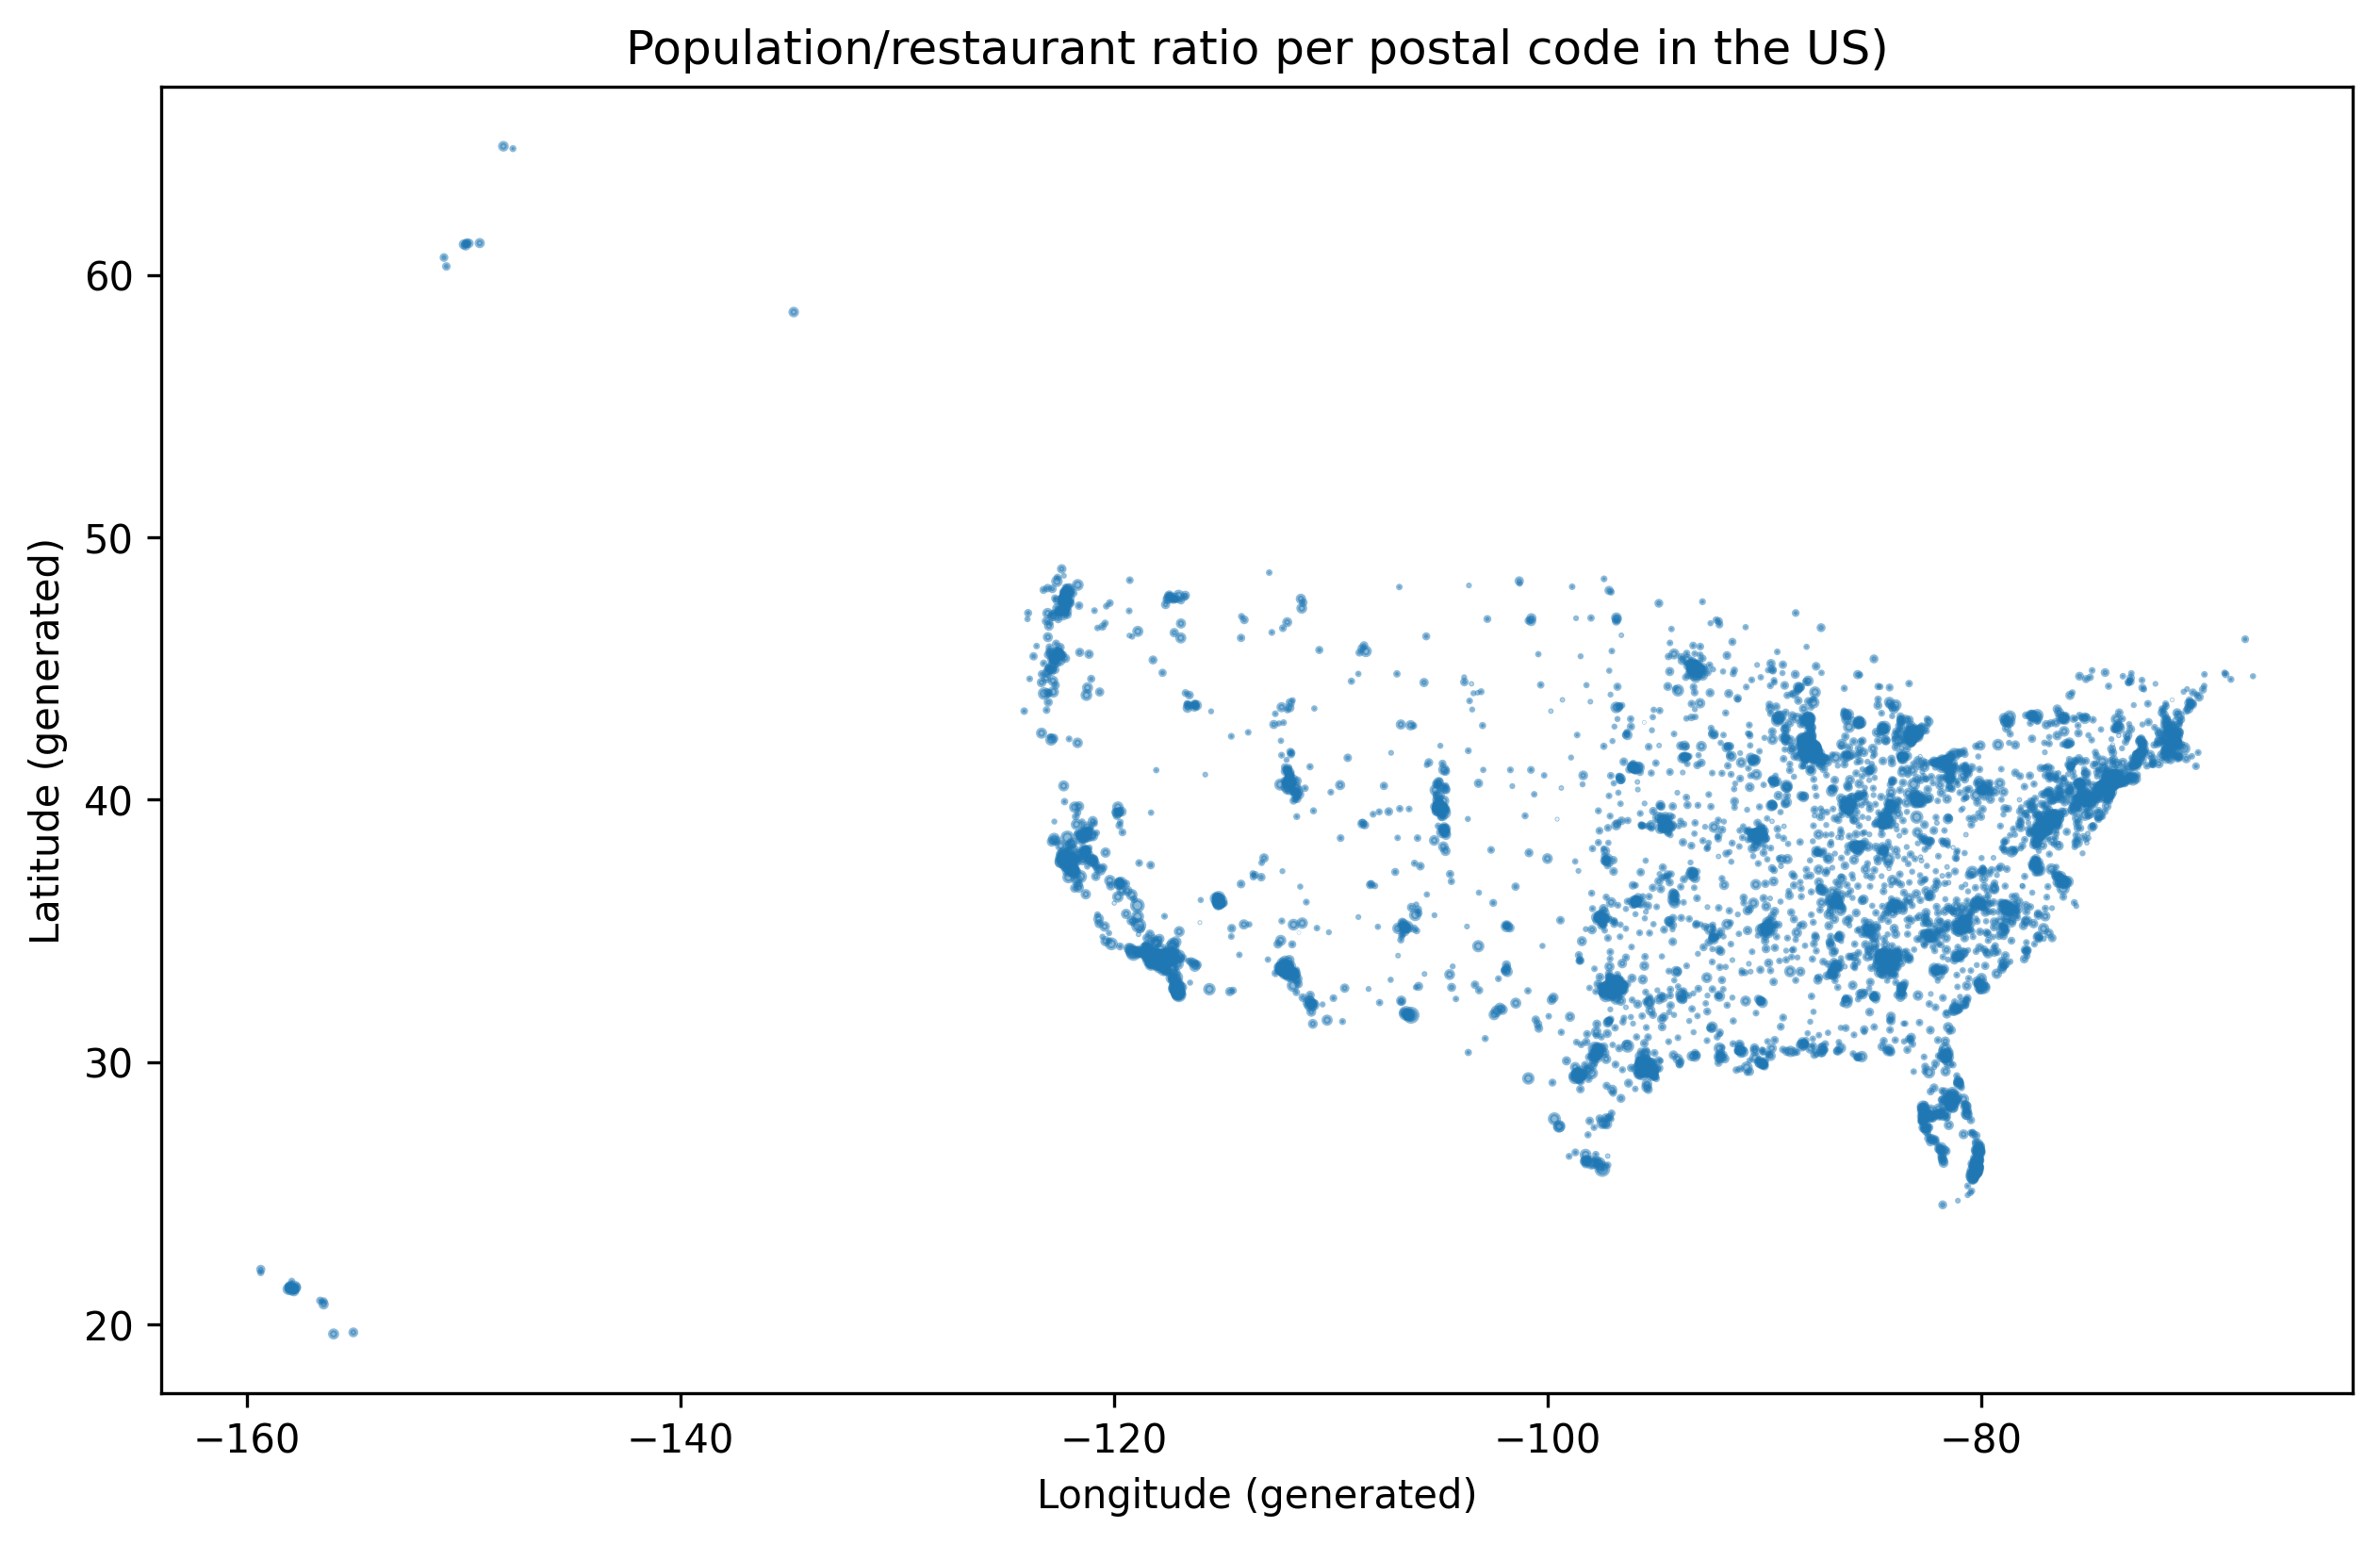

Empty DataFrame
Columns: [postalCode, # of restaurants, population]
Index: []
Empty DataFrame
Columns: [postalCode, # of restaurants, population, ratio]
Index: []


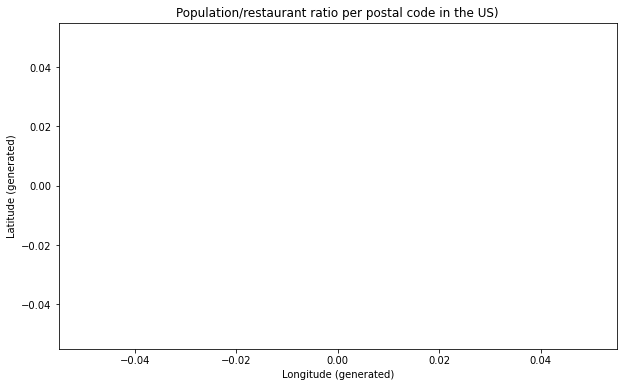

In [65]:
create_postalcode_ratio_graph()

## Creating population / # restaurants ratio vs State code Graph

In [54]:
def create_state_pop_res_ratio_graph():
    """ It calls the previously defined "get_people_per_restaurant_state_ratio()" to 
    create a graphcontaining the ratio that relates the population per state with the numbers of
    restaurants in that state, it uses the postalcodes to generate lat, and lon measures using the 
    uszipcode library.
    
    args: None
    returns: None (Creates an Image)"""
    df = get_people_per_restaurant_state_ratio()
    df = df.sort_values(by='population/restaurants ratio', ascending=True)

    # slice the dataframe into two dataframes with 25 provinces each
    df1 = df[:25]
    df2 = df[25:51]

    # create two separate bar plots for each dataframe
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot the first 25 provinces
    axs[1].barh(df1['province'], df1['population/restaurants ratio'], height=0.8)
    axs[1].set_title('Persons per Restaurant per state(1 - 25)')
    axs[1].set_xlim(0, 80000)
    axs[1].set_xlabel('population/restaurants ratio')
    axs[1].set_ylabel('State')

    # plot the next 25 provinces
    axs[0].barh(df2['province'], df2['population/restaurants ratio'], height=0.8)
    axs[0].set_title('Persons per Restaurant per state(26 - 50)')
    axs[0].set_xlim(0, 80000)
    axs[0].set_xlabel('population/restaurants ratio')
    axs[0].set_ylabel('State')

    plt.tight_layout()
    plt.savefig('population_restaurants_ratio.png', dpi=300, bbox_inches='tight')
    plt.show()

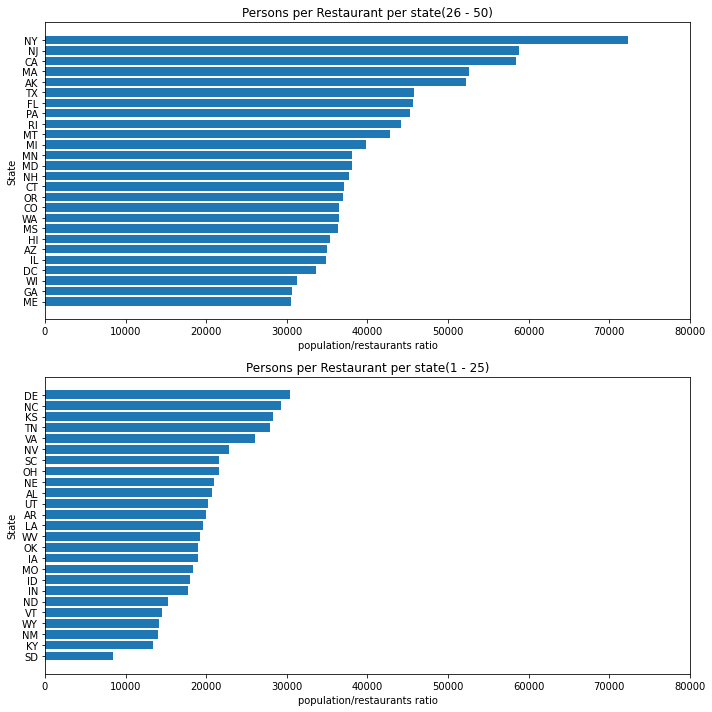

In [55]:
create_state_pop_res_ratio_graph()

## Getting GDP / # Restaurants ratio

In [57]:
def get_income_per_restaurant_state_ratio():
    """ It calls the previously defined functions to create a dataframe containing the ratio
    that relates the GDP per state with the numbers of restaurants in that state.
    
    args: None
    returns: Pandas Dataframe"""
    df = get_people_per_restaurant_state_ratio()
    df2 = clean_income()
    #merge the two dataframes so we can have the province, income and ratio columns
    df = pd.merge(df, df2, on='province') 
    #calculate the ratio of income per restaurant
    df['income/restaurants ratio (USD billions)'] = (df['income']*df["population"])/(1000000000*df['# of restaurants'])
    df['income/restaurants ratio (USD billions)'] = df['income/restaurants ratio (USD billions)'].round(2)
    df['income'] = df['income'].round(2)
    return df

In [58]:
get_income_per_restaurant_state_ratio()

,province,# of restaurants,population,population/restaurants ratio,income,income/restaurants ratio (USD billions)
0,AK,14,731545,52253,72565.15,3.79
1,AL,236,4903185,20776,38838.60,0.81
2,AR,151,3017804,19985,38001.85,0.76
3,AZ,208,7278717,34993,40924.33,1.43
4,CA,676,39512223,58450,61978.32,3.62
5,CO,158,5758736,36447,56429.65,2.06
6,CT,96,3565287,37138,67369.66,2.50
7,DE,32,973764,30430,69386.67,2.11
8,FL,471,21477737,45600,41236.95,1.88
9,GA,347,10617423,30597,46916.28,1.44


## Creating GDP/ # restaurants ratio vs State code Graph

In [59]:
def create_state_inc_res_ratio_graph():
    """ It calls the previously defined "get_people_per_restaurant_state_ratio()" to 
    create a graphcontaining the ratio that relates the GDP per state with the numbers of
    restaurants in that state, it creates a horizontal bargraph with the state in the y axis
    and the $ in the x axis.
    
    args: None
    returns: None (Creates an Image)"""
    df = get_income_per_restaurant_state_ratio()
    df = df.sort_values(by='income/restaurants ratio (USD billions)', ascending=True)

    # slice the dataframe into two dataframes with 25 provinces each
    df1 = df[:25]
    df2 = df[25:51]

    # create two separate bar plots for each dataframe
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot the first 25 provinces
    axs[1].barh(df1['province'], df1['income/restaurants ratio (USD billions)'], height=0.8)
    axs[1].set_title('US Billions of dollars per Restaurant per state(1 - 25)')
    axs[1].set_xlim(0, 10)
    axs[1].set_xlabel('income/restaurants ratio (USD billions)')
    axs[1].set_ylabel('State')

    # plot the next 25 provinces
    axs[0].barh(df2['province'], df2['income/restaurants ratio (USD billions)'], height=0.8)
    axs[0].set_title('US Billions of dollars  per Restaurant per state(26 - 50)')
    axs[0].set_xlim(0, 10)
    axs[0].set_xlabel('income/restaurants ratio (USD billions)')
    axs[0].set_ylabel('State')

    plt.tight_layout()
    plt.savefig('income_restaurants_ratio.png', dpi=300, bbox_inches='tight')
    plt.show()

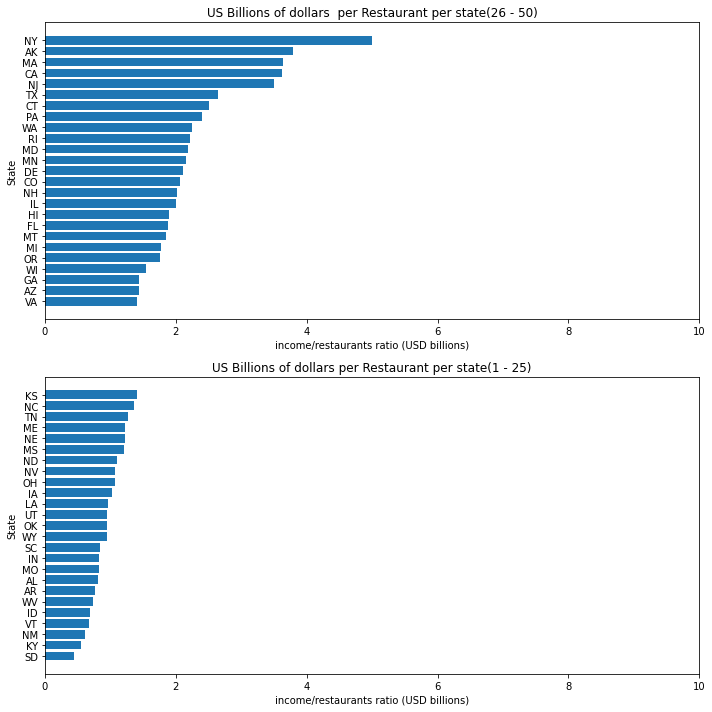

In [60]:
create_state_inc_res_ratio_graph()